# ORgenes

In [1]:
if (!require("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
}

if (!require("ggtree", quietly = TRUE)) {
  BiocManager::install("ggtree")
}

if (!require("gridExtra", quietly = TRUE)) {
  install.packages("gridExtra")
}

if (!require("aplot", quietly = TRUE)) {
  install.packages("aplot")
}


ggtree v3.10.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

G Yu. Data Integration, Manipulation and Visualization of Phylogenetic
Trees (1st ed.). Chapman and Hall/CRC. 2022. ISBN: 9781032233574

Guangchuang Yu. Using ggtree to visualize data on tree-like structures.
Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96




In [2]:
library(ggplot2)
library(gridExtra)
library(aplot)

In [3]:
or_genes <- read.csv("data/ORgenes.csv")
or_genes[
  which(or_genes$Species == "Loxodonta Africana"),
  "Species"
] <- "Loxodonta africana"


In [4]:
write.table(
  or_genes$Species,
  "data/species.txt",
  row.names = FALSE,
  col.names = FALSE,
  quote = FALSE
)


## Five summary statistics
Determine the 5 summary statistics for Functional and non-functional OR gene numbers.

In [5]:
summary(or_genes$Functional)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  139.0   703.0   821.5   757.8   917.8  1765.0 

In [6]:
summary(or_genes$NonFuctional)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  193.0   521.5   826.0   900.1  1199.2  2646.0 

## Normality test
Run a test for normality to see if functional and on-functional OR numbers are normally distributed.

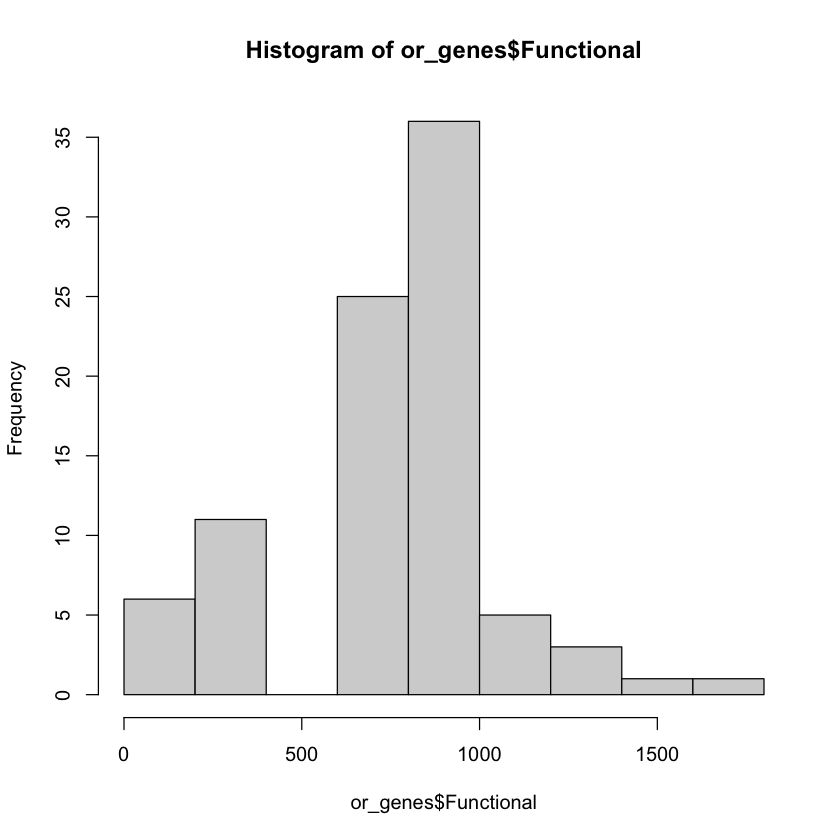

In [7]:
hist(or_genes$Functional)

In [8]:
shapiro.test(or_genes$Functional)


	Shapiro-Wilk normality test

data:  or_genes$Functional
W = 0.89311, p-value = 2.523e-06


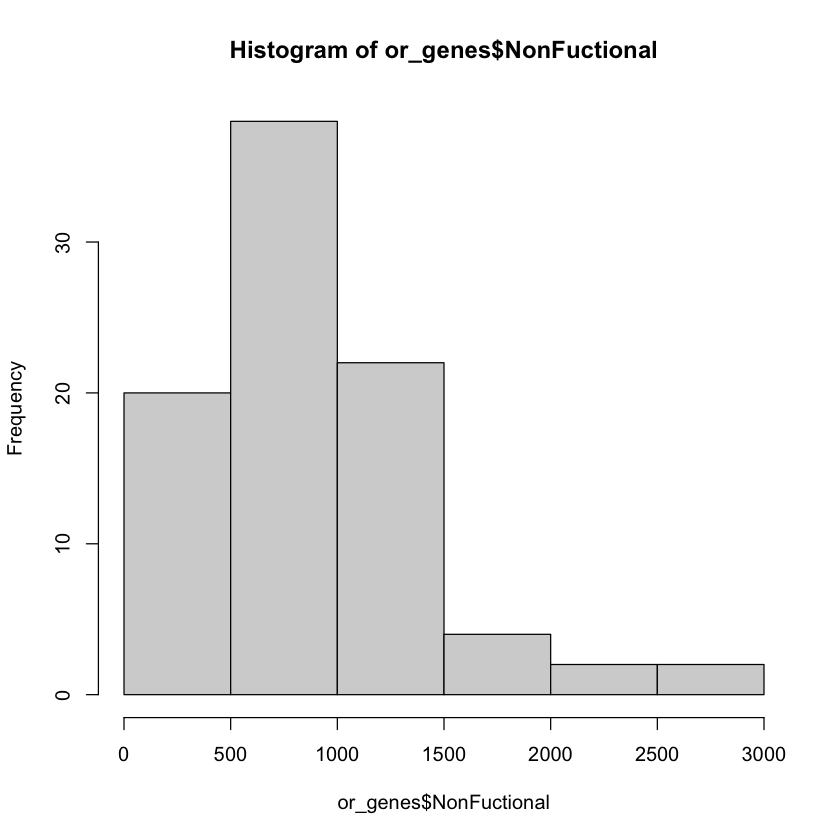

In [9]:
hist(or_genes$NonFuctional)

In [10]:
shapiro.test(or_genes$NonFuctional)


	Shapiro-Wilk normality test

data:  or_genes$NonFuctional
W = 0.90202, p-value = 6.178e-06


Both have p-value less than 0.05, so they are not normally distributed.

## Clustering analysis
Cluster your data for functional and non-functional OR numbers independently to see if there is a clear clustering pattern based on your activity pattern. Clustering can be k-means or PCA.

In [11]:
plot_kmeans_result <- function(or_genes, cluster_range, gene_type) {
  cluster_df <- sapply(cluster_range, function(n) {
    cluster_res <- kmeans(or_genes[, gene_type], n)
    return(as.factor(cluster_res$cluster))
  })
  cluster_df <- as.data.frame(cluster_df, stringsAsFactors = TRUE)
  colnames(cluster_df) <- paste0(cluster_range, "_clusters")
  res <- cbind(or_genes, cluster_df)
  return(res)
}

In [12]:
# plot_kmeans_result(or_genes, 2:3, "Functional")

## Correlation test
Determine if a correlation exists between both functional and non-functional OR gene numbers, based on whether your data is normal or not.

In [13]:
cor.test(or_genes$Functional, or_genes$NonFuctional, method = "spearman")

Warning message in cor.test.default(or_genes$Functional, or_genes$NonFuctional, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  or_genes$Functional and or_genes$NonFuctional
S = 35298, p-value = 1.143e-13
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6891765 


The p-value is $1.143 * 10^{-13}$ which is greater than 0.05, so there might be a correlation between functional gene and non-functional gene number

## Statistical hypothesis test
Use an appropriate hypothesis test to determine if a significant difference exists between activity patterns with respect to functional OR gene numbers.

In [14]:
chisq.test(as.factor(or_genes$Activity.Pattern), or_genes$Functional)

Warning message in chisq.test(as.factor(or_genes$Activity.Pattern), or_genes$Functional):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  as.factor(or_genes$Activity.Pattern) and or_genes$Functional
X-squared = 255.98, df = 240, p-value = 0.2284
